# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np

C:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# check version on pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 1.0.5


In [3]:
# reading the loan prediction data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [4]:
# looking at the first five rows of the data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# shape of the data
print(train_data.shape,test_data.shape)

(614, 13) (367, 12)


In [6]:
# checking missing values in the train data
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation :
    
1. We have missing values in Gender,Married,Dependents,Self_Employed,Loan_Amount,Term,Credit_History
2. Missing values can be filled by 

    - For numerical variables : imputation using mean or median
    - For categorical variables : imputation using mode

In [7]:
# data types of the variables
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1. Filling the missing values

### 1.1 Categorical Data: Mode : Train Data

In [8]:
# filling missing values of categorical variables with mode, as the numbers are not big

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)

train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)

train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)

train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)

train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Median

In [9]:
# filling missing values of continuous variables with mean
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [10]:
# checking missing values after imputation
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 1.2 Categorical Data: Mode : Test Data

In [11]:
# filling missing values of categorical variables with mode, as the numbers are not big

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)

test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)

test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)

test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Median

In [12]:
# filling missing values of continuous variables with mean
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [13]:
# checking missing values after imputation
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [14]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## 2. Converting categories to numbers

### 2.1 Train Data

In [15]:
# converting the categories into numbers using map function
train_data['Gender'] = train_data['Gender'].map({'Male': 0, 'Female': 1})
train_data['Married'] = train_data['Married'].map({'No': 0, 'Yes': 1})
train_data['Dependents'] = train_data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
train_data['Education'] = train_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_data['Self_Employed'] = train_data['Self_Employed'].map({'No': 0, 'Yes': 1})
train_data['Property_Area'] = train_data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
train_data['Loan_Status'] = train_data['Loan_Status'].map({'N': 0, 'Y': 1})

In [16]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


### 2.2 Test Data

In [17]:
# converting the categories into numbers using map function
test_data['Gender'] = test_data['Gender'].map({'Male': 0, 'Female': 1})
test_data['Married'] = test_data['Married'].map({'No': 0, 'Yes': 1})
test_data['Dependents'] = test_data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
test_data['Education'] = test_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test_data['Self_Employed'] = test_data['Self_Employed'].map({'No': 0, 'Yes': 1})
test_data['Property_Area'] = test_data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
#test_data['Loan_Status'] = test_data['Loan_Status'].map({'N': 0, 'Y': 1})

## 3 Feature Engineering

We can come up with new features that can affect the target variable

1. Total Income : Its a income of both applicant and coapplicant put together. EDA suggest that higher the total income more chances of loan approval
2. EMI : If the EMI amount is less, chances of approval is high. It can be calculated using loan_amount divided by loan tenure
3. Balance income : If the balance income after paying out EMI is high, chances of loan approavl is high

In [18]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


### 3.1 First feature : Total Income

<AxesSubplot:xlabel='Total_Income'>

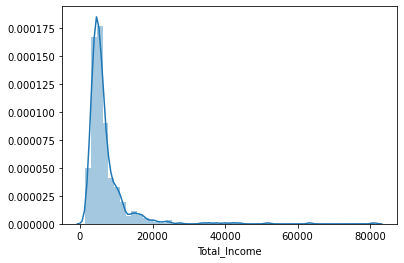

In [19]:
#lets create the new fields

train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
sns.distplot(train_data['Total_Income'])

Observation : distribution is right skewed. Log transformation can make distribution normal

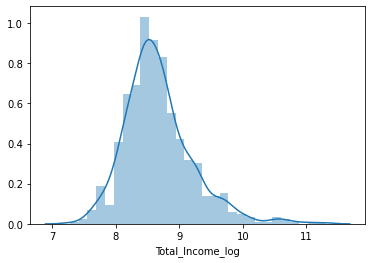

In [20]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

### 3.2 Feature : EMI

<AxesSubplot:xlabel='EMI'>

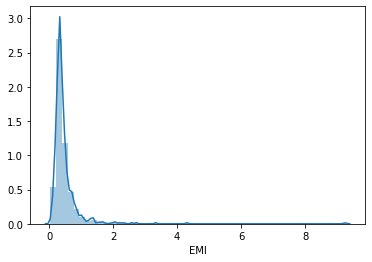

In [21]:
train_data['EMI'] = (train_data['LoanAmount'] / train_data['Loan_Amount_Term'])
test_data['EMI'] = (test_data['LoanAmount'] / test_data['Loan_Amount_Term'])
sns.distplot(train_data['EMI'])

### 3.3 Feature : Balance Income

<AxesSubplot:xlabel='Balance_Income'>

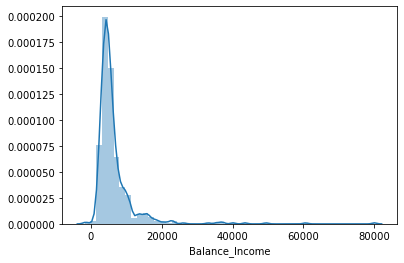

In [22]:
train_data['Balance_Income'] = train_data['Total_Income'] - (train_data['EMI']*1000)
test_data['Balance_Income'] = test_data['Total_Income'] - (test_data['EMI']*1000)
sns.distplot(train_data['Balance_Income'])


In [23]:
#Let us drop the variables which we used to create new variables
train_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)
test_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [24]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001002,0,0,0,1,0,1.0,2,1,5849.0,8.674026,0.355556,5493.444444
1,LP001003,0,1,1,1,0,1.0,0,0,6091.0,8.714568,0.355556,5735.444444
2,LP001005,0,1,0,1,1,1.0,2,1,3000.0,8.006368,0.183333,2816.666667
3,LP001006,0,1,0,0,0,1.0,2,1,4941.0,8.505323,0.333333,4607.666667
4,LP001008,0,0,0,1,0,1.0,2,1,6000.0,8.699515,0.391667,5608.333333


## 4. Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

### 3.1 Train Data

In [25]:
# bringing variables in the range 0 to 1
train_data['Dependents']=(train_data['Dependents']-train_data['Dependents'].min())/(train_data['Dependents'].max()-train_data['Dependents'].min())

In [26]:
# again looking at first five rows of pre-processed data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001002,0,0,0.000000,1,0,1.0,2,1,5849.0,8.674026,0.355556,5493.444444
1,LP001003,0,1,0.333333,1,0,1.0,0,0,6091.0,8.714568,0.355556,5735.444444
2,LP001005,0,1,0.000000,1,1,1.0,2,1,3000.0,8.006368,0.183333,2816.666667
3,LP001006,0,1,0.000000,0,0,1.0,2,1,4941.0,8.505323,0.333333,4607.666667
4,LP001008,0,0,0.000000,1,0,1.0,2,1,6000.0,8.699515,0.391667,5608.333333


In [27]:
# applying for loop to bring all the variables in range 0 to 1

for i in train_data.columns[1:]:
    train_data[i] = (train_data[i] - train_data[i].min()) / (train_data[i].max() - train_data[i].min())

### 3.2 Test data

In [28]:
# applying for loop to bring all the variables in range 0 to 1

for i in test_data.columns[1:]:
    test_data[i] = (test_data[i] - test_data[i].min()) / (test_data[i].max() - test_data[i].min())

In [29]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001015,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.055957,0.316956,0.009659,0.196719
1,LP001022,0.0,1.0,0.333333,1.0,0.0,1.0,1.0,0.039791,0.256950,0.011719,0.182280
2,LP001031,0.0,1.0,0.666667,1.0,0.0,1.0,1.0,0.071218,0.363465,0.022279,0.206534
3,LP001035,0.0,1.0,0.666667,1.0,0.0,1.0,1.0,0.044172,0.274577,0.008371,0.186924
4,LP001051,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.021422,0.167078,0.005538,0.168105


In [30]:
# saving the pre-processed data
train_data.to_csv('loan_prediction_train_data.csv', index=False)
test_data.to_csv('loan_prediction_test_data.csv',index=False)